###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠에 사용되는 데이터는 Kaggle 오픈소스 데이터 입니다.**
출처 : https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative?resource=download

# 데이터 설명

#### User Attributes Overview:
1. User_ID: 각 사용자의 고유 식별자로, 추적 및 분석을 용이하게 합니다.
2. Age: 사용자의 나이로, 인구통계학적 선호도에 대한 인사이트를 제공합니다.
3. Gender: 사용자의 성별, 성별에 따른 추천 및 타겟팅을 가능하게 합니다.
4. Location: 사용자의 위치를 교외, 농촌, 도시 지역으로 분류하여 선호도와 쇼핑 습관에 영향을 줍니다.
5. Income: 구매력 및 경제력을 나타내는 사용자의 소득 수준.
6. Interests: 스포츠, 패션, 기술 등 사용자의 관심사를 파악하여 콘텐츠 및 제품 추천을 안내합니다.
7. Last_Login_Days_Ago: 참여 빈도를 반영하는 사용자의 마지막 로그인 이후 일수입니다.
8. Purchase_Frequency: 사용자의 구매 빈도로, 쇼핑 습관과 충성도를 나타냅니다.
9. Average_Order_Value: 사용자가 주문한 평균 금액으로, 가격 책정 및 프로모션 전략에 중요합니다.
10. Total_Spending: 사용자가 지출한 총 금액으로, 평생 가치와 구매 행동을 나타냅니다.
11. Product_Category_Preference: 특정 제품 카테고리에 대한 사용자의 선호도로, 개인화된 추천을 위한 정보를 제공합니다.
12. Time_Spent_on_Site_Minutes: 사용자가 이커머스 플랫폼에서 보낸 시간으로, 참여 수준을 나타냅니다.
13. Pages_Viewed: 사용자가 방문 기간 동안 열람한 페이지 수로, 검색 활동과 관심사를 반영합니다.
14. Newsletter_Subscription: 사용자가 뉴스레터를 구독하고 있는지 여부를 나타내며, 이를 통해 타겟팅 마케팅 캠페인을 진행할 수 있습니다.

이 데이터 세트를 활용하여 이커머스 비즈니스는 타겟 제품 추천, 맞춤형 마케팅 커뮤니케이션, 맞춤형 프로모션 제안 등 정교한 개인화 전략을 구현하여 궁극적으로 고객 만족도와 충성도를 높일 수 있습니다.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
data = pd.read_csv("/content/user_personalized_features.csv",index_col="Unnamed: 0")

In [118]:
data.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


# 회귀분석

In [119]:
"""
사용자가 보통 얼마를 소비하는지 확인하고자 한다.
"""

'\n사용자가 보통 얼마를 소비하는지 확인하고자 한다.\n'

In [140]:
data_copy = data.copy()

In [141]:
data_copy.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


In [142]:
# prompt: data_copy DataFrame 사용: sklearn을 활용하고, label encoder를 사용하여 모든 변수를 사용하고, "Total_Spending"를 예측하는 선형회귀 분석

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data scaling
numerical_features = ["Total_Spending", "Average_Order_Value", "Time_Spent_on_Site_Minutes", "Pages_Viewed"]
for column in numerical_features:
    scaler = StandardScaler()
    data_copy[column] = scaler.fit_transform(data_copy[column].values.reshape(-1, 1))

# Separate features and target
features = data_copy.drop(['Income','User_ID'], axis=1)
target = data_copy['Income']

# Data split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Encode categorical features
le = LabelEncoder()
for col in X_train.select_dtypes(include='object'):
    X_train[col] = le.fit_transform(X_train[col])

for col in X_test.select_dtypes(include='object'):
    X_test[col] = le.fit_transform(X_test[col])

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions, squared=False)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Print results
print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 36239.28505019985
R-squared score: 0.010805063621877942


In [144]:
X_test

,Age,Gender,Location,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
521,25,1,2,4,14,8,-0.383600,-1.130737,2,-1.352415,0.898941,False
737,38,1,1,0,17,1,-1.550502,1.189237,0,0.203067,0.328049,True
740,34,1,2,0,20,1,0.236316,-0.568874,1,-1.380903,0.613495,False
660,38,0,1,4,3,9,-1.258776,-1.196217,3,1.017844,1.184387,True
411,61,0,0,2,5,3,-0.438299,0.566822,3,1.371103,0.970302,False
...,...,...,...,...,...,...,...,...,...,...,...,...
408,54,1,0,2,21,1,0.728602,-0.195707,2,-0.999155,0.113964,True
332,34,0,0,3,5,3,-0.310669,-0.007011,1,-1.363810,0.328049,True
208,40,1,2,0,28,4,0.382178,-1.080043,1,-0.150192,0.684856,False
613,22,0,0,2,27,8,-0.894120,1.088552,4,0.220161,-0.171482,False


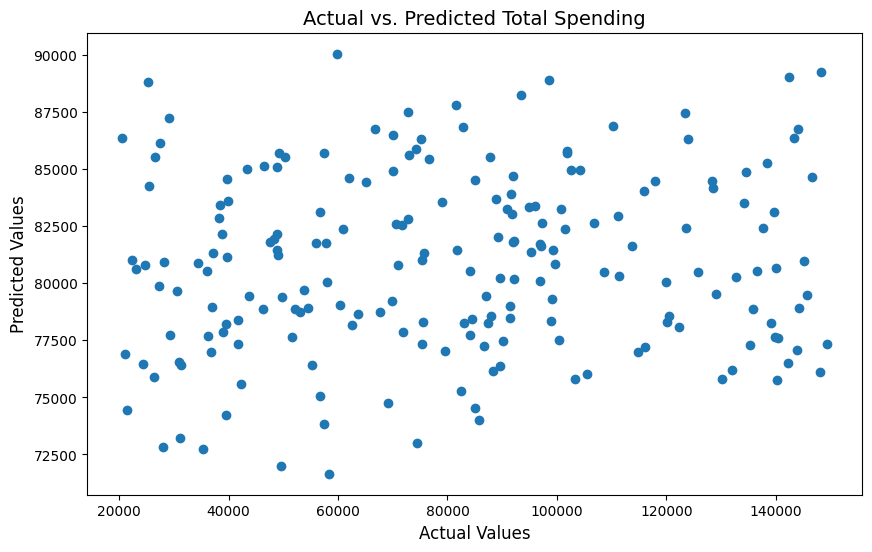

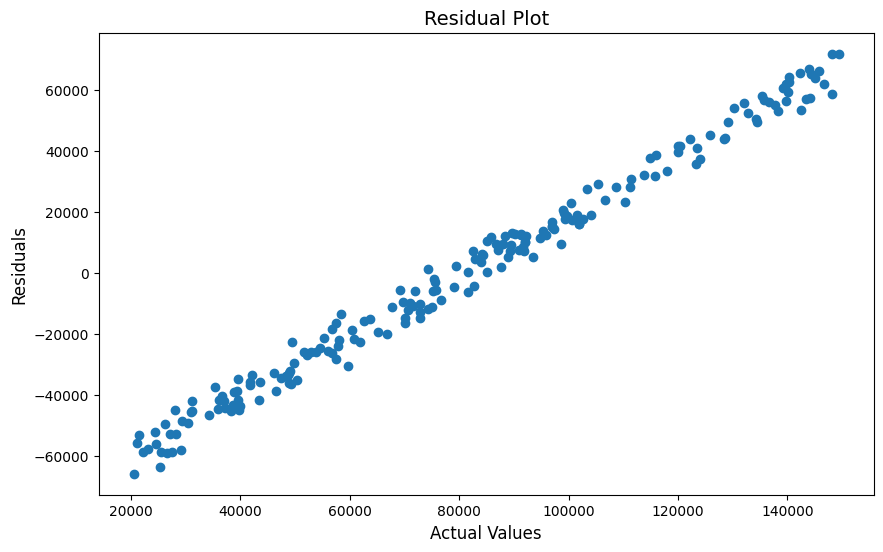

In [145]:
# prompt: regression 결과 시각화

import matplotlib.pyplot as plt
# Plot the actual values vs. the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs. Predicted Total Spending", fontsize=14)
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - predictions)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot", fontsize=14)
plt.show()


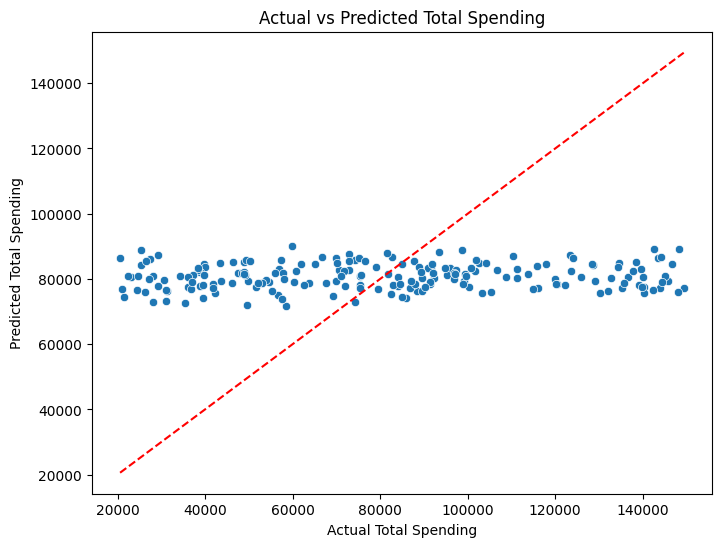

Mean Squared Error: 1313285780.9496381
R-squared: 0.010805063621877942


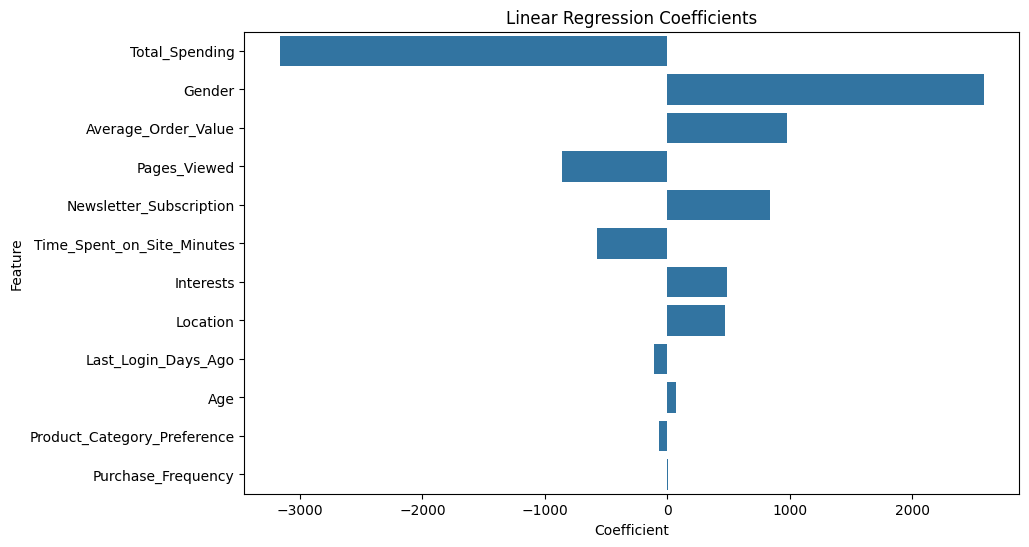

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test)

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Total Spending")
plt.ylabel("Predicted Total Spending")
plt.title("Actual vs Predicted Total Spending")

# Add a line showing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize coefficients (if you want to interpret the model)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Linear Regression Coefficients")
plt.show()

In [153]:
# prompt: data_copy DataFrame 사용: sklearn을 활용하고, label encoder를 사용하여 모든 변수를 사용하고, "Total_Spending"를 예측하는 선형회귀 분석

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data scaling
numerical_features = ["Total_Spending", "Average_Order_Value", "Time_Spent_on_Site_Minutes", "Pages_Viewed"]
for column in numerical_features:
    scaler = StandardScaler()
    data_copy[column] = scaler.fit_transform(data_copy[column].values.reshape(-1, 1))

# Separate features and target
features = data_copy[['Total_Spending','Gender']]
target = data_copy['Income']

# Data split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Encode categorical features
le = LabelEncoder()
for col in X_train.select_dtypes(include='object'):
    X_train[col] = le.fit_transform(X_train[col])

for col in X_test.select_dtypes(include='object'):
    X_test[col] = le.fit_transform(X_test[col])

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [154]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions, squared=False)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Print results
print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 36135.98837124503
R-squared score: 0.016436241146032038


# 분류문제

In [156]:
data_copy = data.copy()

In [157]:
"""
Newsletter_Subscription를 구독하는지 안하는지 구별하고 싶다.
"""

'\nNewsletter_Subscription를 구독하는지 안하는지 구별하고 싶다.\n'

In [167]:
# prompt: Newsletter_Subscription를 구독하는지 안하는지 구별하는 모델을 sklearn 을 통해 구축하고싶어

# Data preprocessing
data_copy["Newsletter_Subscription"] = data_copy["Newsletter_Subscription"].astype("category")
data_copy["Newsletter_Subscription"] = data_copy["Newsletter_Subscription"].cat.codes

# Data scaling
numerical_features = ["Total_Spending", "Average_Order_Value", "Time_Spent_on_Site_Minutes", "Pages_Viewed", "Income","Last_Login_Days_Ago","Purchase_Frequency","Age"]
for column in numerical_features:
    scaler = StandardScaler()
    data_copy[column] = scaler.fit_transform(data_copy[column].values.reshape(-1, 1))

# Separate features and target
features = data_copy.drop(["User_ID", "Newsletter_Subscription"], axis=1)
target = data_copy["Newsletter_Subscription"]

# Data split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Encode categorical features
le = LabelEncoder()
for col in X_train.select_dtypes(include='object'):
    X_train[col] = le.fit_transform(X_train[col])

for col in X_test.select_dtypes(include='object'):
    X_test[col] = le.fit_transform(X_test[col])

# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Improve the model (optional)
# You can try different hyperparameters, feature engineering techniques, or even different models to improve the accuracy.


Accuracy: 0.485


In [168]:
X_train

,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed
29,0.223407,0,2,0.180780,4,-1.168811,1.187797,-1.568734,0.194359,2,1.205869,1.113025
535,-0.221331,0,2,-1.299809,3,-1.290739,0.835231,0.910930,1.101930,4,1.547733,-0.456928
695,0.297529,1,1,1.709567,3,0.903981,0.482664,0.400411,-0.214013,1,-0.959271,1.683917
557,0.445775,1,2,0.419605,1,1.635554,1.187797,-0.383600,-1.279300,0,1.502151,0.542133
836,0.371652,0,2,-1.539063,3,-1.778455,1.187797,-1.149379,0.566118,3,0.812725,0.113964
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.816390,0,1,-0.658121,1,0.538194,0.835231,-1.112914,-1.107502,0,-1.158692,0.613495
270,-1.110806,1,0,1.097843,4,1.635554,1.540364,1.603778,-1.433496,3,-0.229961,0.542133
860,1.705865,1,1,0.518011,3,1.635554,-0.222470,0.546274,-1.568681,3,-1.637301,0.328049
435,-1.110806,0,1,-1.078228,2,1.635554,1.540364,0.929163,1.394127,4,-0.326822,0.113964


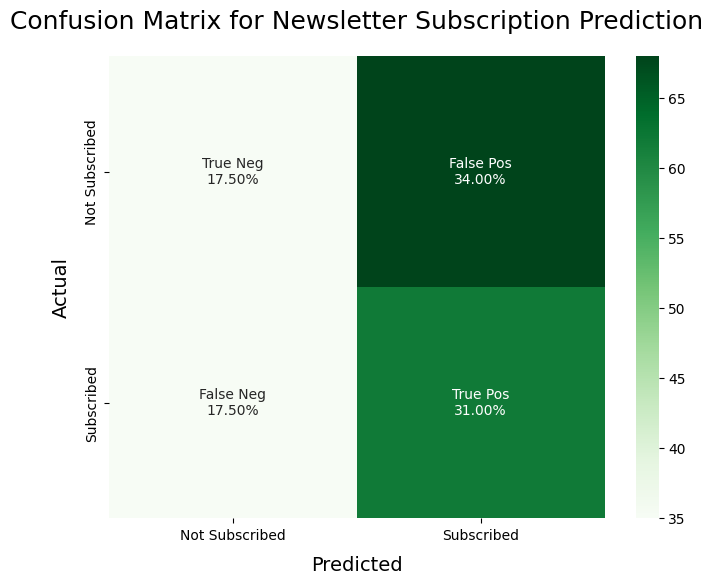

In [173]:
# prompt: 분류 성능 시각화 좀 더 잘 보이게

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

# Define labels and group names
categories = ['Not Subscribed', 'Subscribed']
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Calculate group percentages
group_percentages = [f'{value:.2%}' for value in cf_matrix.flatten() / np.sum(cf_matrix)]

# Combine labels and percentages
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Configure plot
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, cmap='Greens', fmt='',
            xticklabels=categories, yticklabels=categories)

# Set labels and title
plt.xlabel("Predicted", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix for Newsletter Subscription Prediction", fontdict={'size': 18}, pad=20)
plt.show()


# 군집분석

In [216]:
data_copy = data.copy()

In [218]:
categorical_features = data_copy.select_dtypes(include=['object']).columns.tolist()
numerical_features = data_copy.select_dtypes(include=[np.number]).columns.tolist()

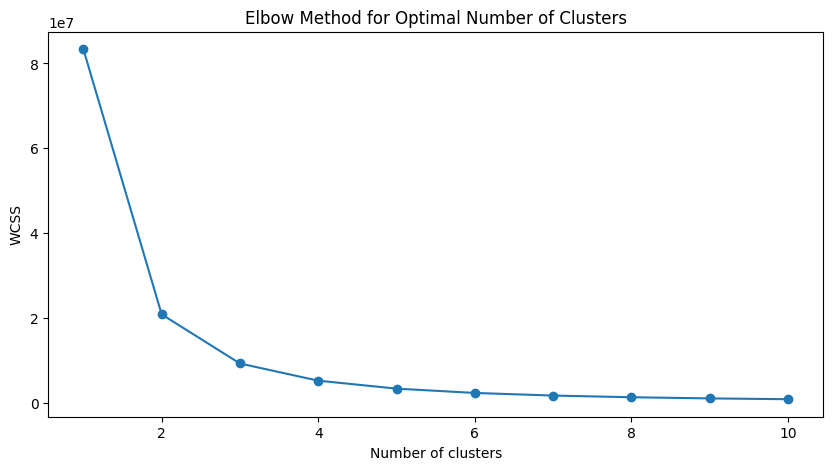

In [219]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data_copy[column] = le.fit_transform(data_copy[column])
    label_encoders[column] = le

scaler = StandardScaler()
data_copy[numerical_features] = scaler.fit_transform(data_copy[numerical_features])

pca = PCA(n_components=5)
pca_components = pca.fit_transform(data_copy)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(data_copy)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

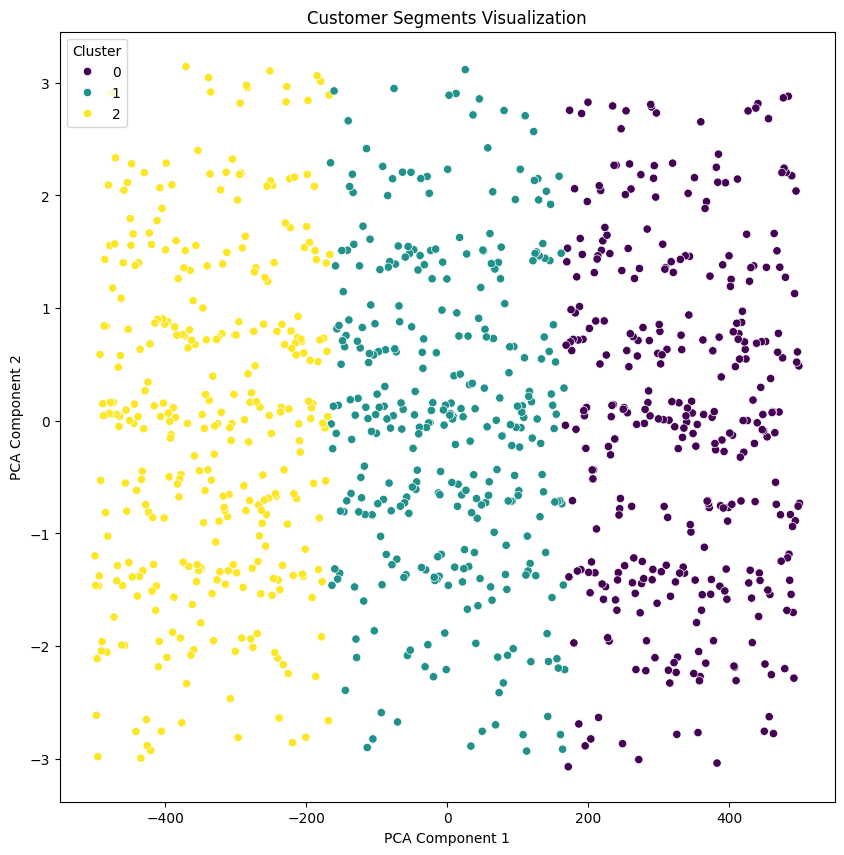

In [220]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
data_copy['Cluster'] = kmeans.fit_predict(data_copy)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data_copy['Cluster'], palette='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [222]:
data_copy['Product_Category_Preference'] = label_encoders['Product_Category_Preference'].inverse_transform(data_copy['Product_Category_Preference'])

preferred_product_category_per_cluster = data_copy.groupby('Cluster')['Product_Category_Preference'].agg(lambda x: x.value_counts().idxmax())

print("Most Preferred Product Category for Each Cluster:")
print(preferred_product_category_per_cluster)

Most Preferred Product Category for Each Cluster:
Cluster
0    Home & Kitchen
1       Electronics
2           Apparel
Name: Product_Category_Preference, dtype: object


In [ ]:
|